<a href="https://www.kaggle.com/code/chandanarprasad/p1-customer-churn-prediction-teleco-ibm?scriptVersionId=118833016" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Customer churn, also known as customer attrition, customer turnover, or customer defection, is the loss of clients or customers.(wiki)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.drop(['customerID'], axis = 1)
print('Shape: ',df.shape)
print('Missing values count: ',df.isna().any().sum())
df.head(10)

Shape:  (7043, 20)
Missing values count:  0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [5]:
df.TotalCharges.value_counts(bins=5)

(-8.686, 1736.96]     3928
(1736.96, 3473.92]    1188
(3473.92, 5210.88]     874
(5210.88, 6947.84]     707
(6947.84, 8684.8]      346
Name: TotalCharges, dtype: int64

In [6]:
df.MonthlyCharges.value_counts(bins=5)

(78.55, 98.65]                 1826
(18.148999999999997, 38.35]    1797
(58.45, 78.55]                 1367
(98.65, 118.75]                1048
(38.35, 58.45]                 1005
Name: MonthlyCharges, dtype: int64

<AxesSubplot:ylabel='PaymentMethod'>

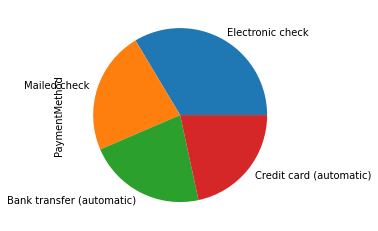

In [7]:
df.PaymentMethod.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='gender'>

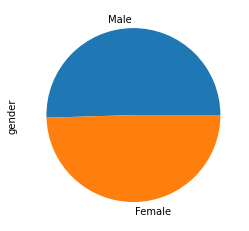

In [8]:
df.gender.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SeniorCitizen'>

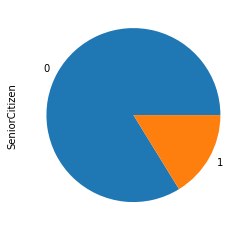

In [9]:
df.SeniorCitizen.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='TechSupport'>

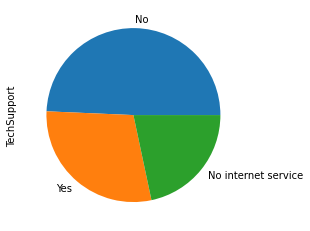

In [10]:
df.TechSupport.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='PhoneService'>

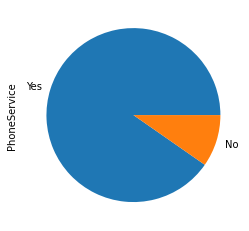

In [11]:
df.PhoneService.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='PaperlessBilling'>

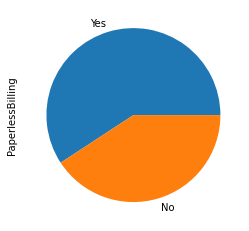

In [12]:
df.PaperlessBilling.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Churn'>

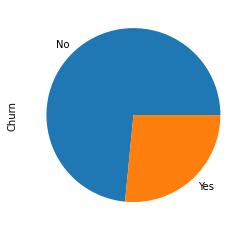

In [13]:
df.Churn.value_counts().plot(kind='pie')

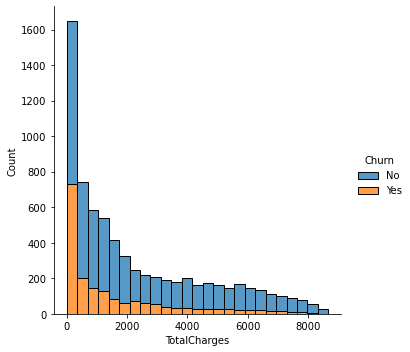

In [14]:
sns.displot(data=df, x="TotalCharges", hue="Churn", multiple="stack")

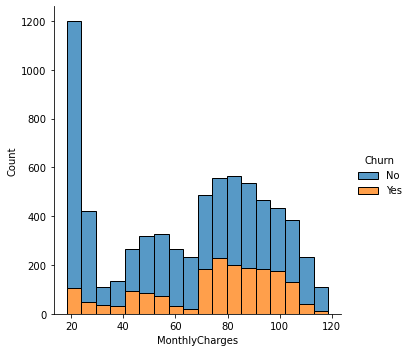

In [15]:
sns.displot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack")

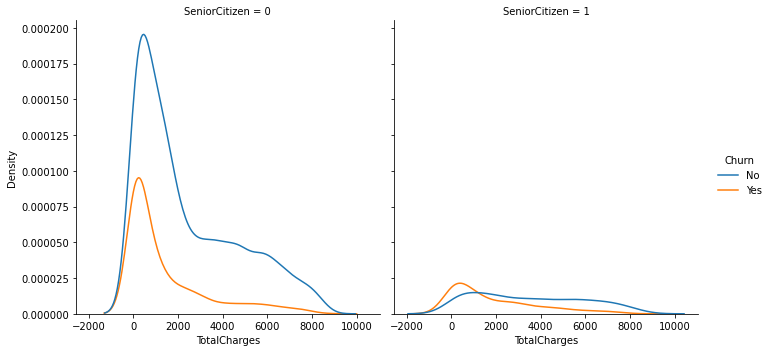

In [16]:
sns.displot(data=df, x="TotalCharges", hue="Churn", col="SeniorCitizen", kind="kde")

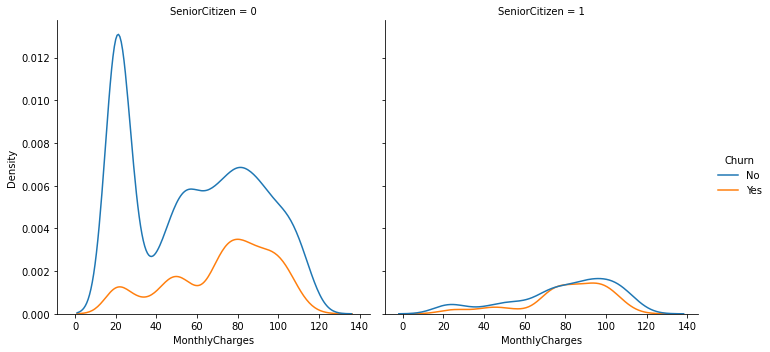

In [17]:
sns.displot(data=df, x="MonthlyCharges", hue="Churn", col="SeniorCitizen", kind="kde")

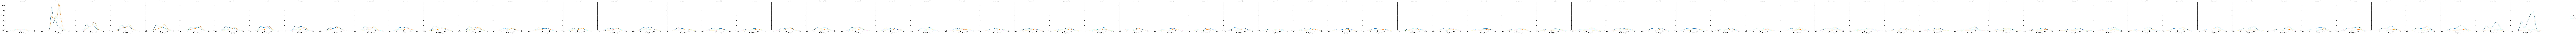

In [18]:
sns.displot(data=df, x="MonthlyCharges", hue="Churn", col="tenure", kind="kde")

In [19]:
num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(exclude=[np.number])

In [20]:
num_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [21]:
cat_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Partner', ylabel='TotalCharges'>

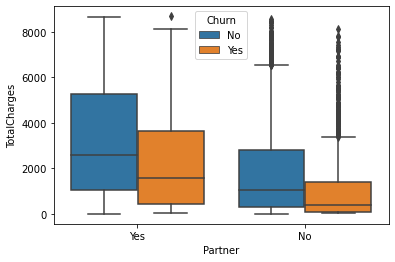

In [22]:
sns.boxplot(data=df, x="Partner", y="TotalCharges", hue="Churn")

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

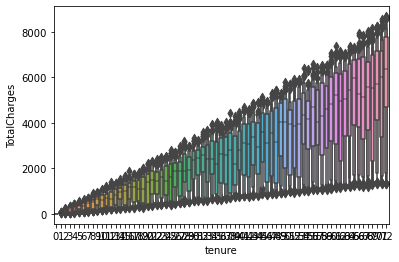

In [23]:
sns.boxenplot(data=df, x="tenure", y="TotalCharges")

<AxesSubplot:>

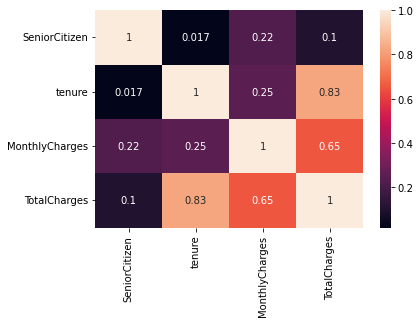

In [24]:
sns.heatmap(num_df.corr(),annot=True)

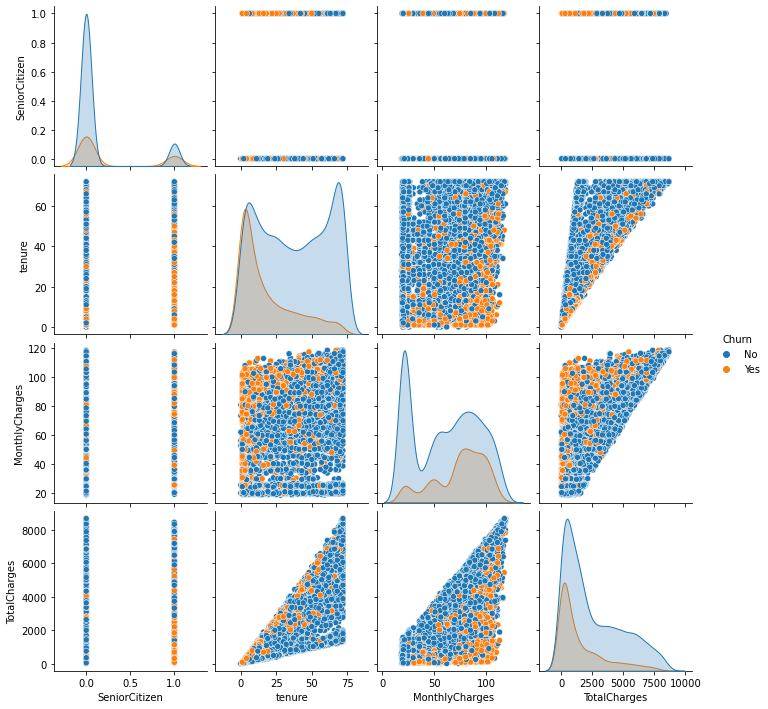

In [25]:
sns.pairplot(df,hue='Churn')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [27]:
# def enc(dff):
#     if dff.dtype=='object':
#         dff = LabelEncoder().fit_transform(dff)
#     return dff

In [28]:
# data = df.apply(lambda x: enc(x))

In [29]:
# data.head()

In [30]:
# data.corr()['Churn'].sort_values(ascending = False).head()

In [31]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1


In [32]:
dff = pd.get_dummies(df)
dff.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.850000,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.500000,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.150002,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.750000,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.649994,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [33]:
dff.value_counts("Churn")

Churn
0    5174
1    1869
dtype: int64

In [34]:
dff.shape

(7043, 46)

In [35]:
X = dff.drop('Churn',axis = 1)
y = dff['Churn']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [37]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(4930, 45) (2113, 45) (4930,) (2113,)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [39]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

print(classification_report(y_test, predicted_y))

KNN accuracy: 0.783719829626124
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.63      0.45      0.52       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [40]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

print(classification_report(y_test, predicted_y))

SVM accuracy is : 0.73450070989115
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.63      0.45      0.52       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [41]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predicted_y))

Decision Tree accuracy is : 0.7245622337908187
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.63      0.45      0.52       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [42]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
a_preds = ada.predict(X_test)
print("AdaBoost Classifier accuracy",accuracy_score(y_test, a_preds))

print(classification_report(y_test, a_preds))

AdaBoost Classifier accuracy 0.7983909133932797
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.64      0.56      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

